In [1]:
#Import the required packages
import numpy as np
import cv2
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the data

##Read in the csv containing immage paths and associated steering angles 
lines = []

with open("./simulator data/data136n9/driving_log.csv") as csvfile: 
    reader = csv.reader (csvfile)
    for line in reader:
        lines.append(line)

x_train = []
y_train = []


##Read in the center camera images
for line in lines:
    source_path_center = line[0].strip()
    current_path_center = "./simulator data/data136n9/"+source_path_center  
    image = cv2.imread(current_path_center)
    x_train.append(image)
    measurement_center = float(line[3])
    y_train.append(measurement_center)
print ("Central Camera Data Loaded")

##Read in the left camera image
for line in lines:
    source_path_left = line[1].strip()
    current_path_left = "./simulator data/data136n9/"+source_path_left 
    image = cv2.imread(current_path_left)
    x_train.append(image)
    measurement_left = float(line[3])+.165
    y_train.append(measurement_left)
print ("Left Camera Data Loaded")

##Read in the right camera image
for line in lines:
    source_path_right = line[2].strip()
    current_path_right = "./simulator data/data136n9/"+source_path_right
    image = cv2.imread(current_path_right)
    x_train.append(image)
    measurement_right = float(line[3])-.165
    y_train.append(measurement_right)
print ("Right Camera Data Loaded")

Central Camera Data Loaded
Left Camera Data Loaded
Right Camera Data Loaded


In [3]:
#Convert the image data to numpy array
def as_array(array):
    return (np.array(array))

x_train = as_array(x_train)
y_train = as_array(y_train)

(18306, 160, 320, 3)


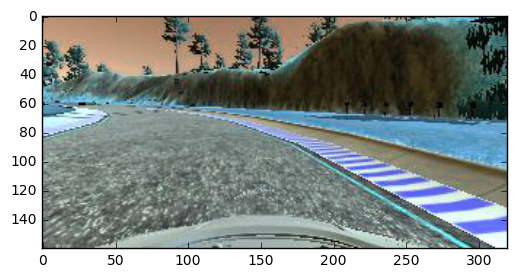

In [4]:
print(np.shape(x_train))
plt.imshow(x_train[1],cmap="gray")

In [5]:
#Find out the images which have non-zero steering angles
non_zero = np.nonzero(y_train)
non_zero

(array([    2,     3,     4, ..., 18303, 18304, 18305], dtype=int64),)

In [6]:
#Flip the non-zero steering angle image data
def flip_images(image_array):
    flipped = []
    for x in range(np.shape(image_array)[0]):
        image = np.fliplr(image_array[x])
        flipped.append(image)
    return (flipped)

def flip_measures(measure_array):
    flipped=[]
    for x in range(np.shape(measure_array)[0]):
        flipped.append(-measure_array[x])
    return (flipped)

x_train = np.append(x_train, flip_images(x_train[non_zero[0]]), axis =0)
y_train = np.append(y_train, flip_measures(y_train[non_zero[0]]), axis=0)
print("Center images flipped!")

Center images flipped!


In [7]:
#Final shape of training data
np.shape(x_train)

(32597, 160, 320, 3)

In [8]:
#Build a model using Keras with TensorFlow as backend

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, MaxPooling2D, Convolution2D, Cropping2D, Activation, Dropout

print("Training!")
model=Sequential()
model.add(Cropping2D(cropping=((60,23),(0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x/255 -0.5))
model.add(Convolution2D(3, 3,3))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(5, 3,3))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer = "adam")
model.fit(x_train, y_train, validation_split = 0.25, shuffle = True, epochs = 3)

model.save("model.h5") #change model name according to the data combinations
print("Model saved")

Using TensorFlow backend.


Training!


C:\Users\DM-Local\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3))`
C:\Users\DM-Local\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`


Train on 24447 samples, validate on 8150 samples
Epoch 1/3
24447/24447 [==============================] - 379s - loss: 0.0822 - val_loss: 0.0922
Epoch 2/3
24447/24447 [==============================] - 368s - loss: 0.0551 - val_loss: 0.0854
Epoch 3/3
24447/24447 [==============================] - 372s - loss: 0.0522 - val_loss: 0.0897
Model saved
